In [1]:
import pandas as pd, numpy as np
from pathlib import Path
from vivarium import Artifact
import db_queries
from get_draws.api import get_draws

from vivarium_testing_utils.automated_validation import ValidationContext

from vivarium_gates_mncnh.validation.measures import NeonatalCauseSpecificMortalityRisk, NeonatalPretermBirthMortalityRisk

In [2]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
results_dir = Path('/mnt/team/simulation_science/pub/models/vivarium_gates_mncnh/results/automated_vv/ethiopia/2025_12_19_14_51_22/')

In [4]:
# Create validation context
vc = ValidationContext(results_dir)

In [5]:
vc.age_groups

,,
age_start,age_end,age_group
0.000000,0.019178,Early Neonatal
0.019178,0.076712,Late Neonatal
0.076712,0.500000,1-5 months
0.500000,1.000000,6-11 months
1.000000,2.000000,12 to 23 months
2.000000,5.000000,2 to 4
5.000000,10.000000,5 to 9
10.000000,15.000000,10 to 14
15.000000,20.000000,15 to 19


In [6]:
# List outputs
vc.get_sim_outputs()

['abortion_miscarriage_ectopic_pregnancy_counts',
 'abortion_miscarriage_ectopic_pregnancy_ylds',
 'all_causes_relative_risk',
 'anc_hemoglobin',
 'anc_other',
 'antibiotics',
 'azithromycin',
 'births',
 'cpap',
 'maternal_disorders_burden_observer_disorder_deaths',
 'maternal_disorders_burden_observer_disorder_ylls',
 'maternal_hemorrhage_counts',
 'maternal_hemorrhage_ylds',
 'maternal_obstructed_labor_and_uterine_rupture_counts',
 'maternal_obstructed_labor_and_uterine_rupture_ylds',
 'maternal_sepsis_and_other_maternal_infections_counts',
 'maternal_sepsis_and_other_maternal_infections_ylds',
 'misoprostol',
 'neonatal_acmrisk_count',
 'neonatal_acmrisk_nonzero_count',
 'neonatal_acmrisk_sum',
 'neonatal_acmrisk_sum_of_squares',
 'neonatal_burden_observer_disorder_deaths',
 'neonatal_burden_observer_disorder_ylls',
 'neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma_death_counts',
 'neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma_relative_risk',
 'neonatal_impossib

In [7]:
# Artifact keys
vc.get_artifact_keys()

['cause.abortion_miscarriage_ectopic_pregnancy.cause_specific_mortality_rate',
 'cause.abortion_miscarriage_ectopic_pregnancy.incidence_rate',
 'cause.abortion_miscarriage_ectopic_pregnancy.yld_rate',
 'cause.all_causes.adjusted_birth_counts',
 'cause.all_causes.all_cause_mortality_risk',
 'cause.all_causes.cause_specific_mortality_rate',
 'cause.ectopic_pregnancy.raw_incidence_rate',
 'cause.facility_choice.bemonc_facility_fraction',
 'cause.facility_choice.probability_bemonc_birth',
 'cause.facility_choice.probability_cemonc_birth',
 'cause.facility_choice.probability_home_birth',
 'cause.facility_choice.probability_home_birth_given_full_term',
 'cause.facility_choice.probability_home_birth_given_preterm',
 'cause.maternal_abortion_and_miscarriage.raw_incidence_rate',
 'cause.maternal_hemorrhage.cause_specific_mortality_rate',
 'cause.maternal_hemorrhage.incidence_rate',
 'cause.maternal_hemorrhage.yld_rate',
 'cause.maternal_obstructed_labor_and_uterine_rupture.cause_specific_mortal

In [8]:
# Subset to neonatal mortality risk artifact keys
[key for key in vc.get_artifact_keys() if "mortality_risk" in key]

['cause.all_causes.all_cause_mortality_risk',
 'cause.neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma.mortality_risk',
 'cause.neonatal_preterm_birth.mortality_risk',
 'cause.neonatal_sepsis_and_other_neonatal_infections.mortality_risk']

In [9]:
# Simulation outputs
vc.get_sim_outputs()

['abortion_miscarriage_ectopic_pregnancy_counts',
 'abortion_miscarriage_ectopic_pregnancy_ylds',
 'all_causes_relative_risk',
 'anc_hemoglobin',
 'anc_other',
 'antibiotics',
 'azithromycin',
 'births',
 'cpap',
 'maternal_disorders_burden_observer_disorder_deaths',
 'maternal_disorders_burden_observer_disorder_ylls',
 'maternal_hemorrhage_counts',
 'maternal_hemorrhage_ylds',
 'maternal_obstructed_labor_and_uterine_rupture_counts',
 'maternal_obstructed_labor_and_uterine_rupture_ylds',
 'maternal_sepsis_and_other_maternal_infections_counts',
 'maternal_sepsis_and_other_maternal_infections_ylds',
 'misoprostol',
 'neonatal_acmrisk_count',
 'neonatal_acmrisk_nonzero_count',
 'neonatal_acmrisk_sum',
 'neonatal_acmrisk_sum_of_squares',
 'neonatal_burden_observer_disorder_deaths',
 'neonatal_burden_observer_disorder_ylls',
 'neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma_death_counts',
 'neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma_relative_risk',
 'neonatal_impossib

In [10]:
[o for o in vc.get_sim_outputs() if 'death_counts' in o]

['neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma_death_counts',
 'neonatal_preterm_birth_with_rds_death_counts',
 'neonatal_preterm_birth_without_rds_death_counts',
 'neonatal_sepsis_and_other_neonatal_infections_death_counts',
 'other_causes_death_counts']

In [11]:
sepsis_compare_key = "cause.neonatal_sepsis_and_other_neonatal_infections.mortality_risk"

In [12]:
# Add custom NeonatalCauseSpecificMortalityRisk measure class measure mapper
# This allows the ValidationContext to use custom measure classes that are not 
# included in the standard measure classes in VTU
vc.add_new_measure(sepsis_compare_key, NeonatalCauseSpecificMortalityRisk)

In [13]:
# Compare simulation outputs to artifact
vc.add_comparison(
    sepsis_compare_key,
    test_source="sim",
    ref_source="artifact",
)

2026-01-14 14:34:57.278 | INFO     | vivarium_testing_utils.automated_validation.data_transformation.age_groups:_format_dataframe:584 - Rebinning DataFrame age groups from <vivarium_testing_utils.automated_validation.data_transformation.age_groups.AgeSchema object at 0x7ff7653d9790> to <vivarium_testing_utils.automated_validation.data_transformation.age_groups.AgeSchema object at 0x7ff7653d9f90>.
2026-01-14 14:35:00.500 | INFO     | vivarium_testing_utils.automated_validation.data_transformation.age_groups:_format_dataframe:584 - Rebinning DataFrame age groups from <vivarium_testing_utils.automated_validation.data_transformation.age_groups.AgeSchema object at 0x7ff765425890> to <vivarium_testing_utils.automated_validation.data_transformation.age_groups.AgeSchema object at 0x7ff7653e2350>.
2026-01-14 14:35:03.459 | INFO     | vivarium_testing_utils.automated_validation.data_transformation.age_groups:_format_dataframe:584 - Rebinning DataFrame age groups from <vivarium_testing_utils.auto

In [14]:
# Comparison metadata
sepsis_metadata = vc.metadata(sepsis_compare_key)

2026-01-14 14:35:36.268 | WARNING  | vivarium_testing_utils.automated_validation.data_transformation.calculations:ratio:73 - Denominator has zero values. These will be put into the ratio dataframe as NaN.
2026-01-14 14:36:26.930 | WARNING  | vivarium_testing_utils.automated_validation.data_transformation.calculations:ratio:73 - Denominator has zero values. These will be put into the ratio dataframe as NaN.


,Test Data,Reference Data
Property,,
Measure Key,cause.neonatal_sepsis_and_other_neonatal_infections.mortality_risk,cause.neonatal_sepsis_and_other_neonatal_infections.mortality_risk
Source,sim,artifact
Shared Indices,"age_group, input_draw, sex","age_group, input_draw, sex"
Source Specific Indices,"acs_availability,acs_eligibility,antibiotics_availability,cpap_availability,delivery_facility_type,preterm_birth,probiotics_availability,random_seed, scenario","year_end, year_start"
Size,"16,640,000 rows × 1 columns","12,500 rows × 1 columns"
Num Draws,10,250
Input Draws,"22, 60, 71, 79, 115, 118, 146,167, 197, 244",range(0-249)
Num Seeds,10,
Run Time,Dec 19 14:51 2025,Dec 17 11:04 2025


In [15]:
sepsis_csmrisk_frame = vc.get_frame(
    sepsis_compare_key, 
    # aggregate_draws=True, 
    # stratifications=[],
)
sepsis_csmrisk_frame

2026-01-14 14:36:27.011 | WARNING  | vivarium_testing_utils.automated_validation.data_transformation.calculations:ratio:73 - Denominator has zero values. These will be put into the ratio dataframe as NaN.
2026-01-14 14:36:31.280 | WARNING  | vivarium_testing_utils.automated_validation.data_transformation.calculations:ratio:73 - Denominator has zero values. These will be put into the ratio dataframe as NaN.


test_rate  \
entity                                        measure        sex    age_group     input_draw              
neonatal_sepsis_and_other_neonatal_infections mortality_risk Female 1-5 months    22                NaN   
                                                                                  60                NaN   
                                                                                  71                NaN   
                                                                                  79                NaN   
                                                                                  115               NaN   
...                                                                                                 ...   
                                                             Male   Late Neonatal 118          0.001360   
                                                                                  146          0.001897   
                                                                                  167          0.001586   
                                                                                  197          0.001781   
                                                                                  244          0.000936   

                                                                                              reference_rate  \
entity                                        measure        sex    age_group     input_draw                   
neonatal_sepsis_and_other_neonatal_infections mortality_risk Female 1-5 months    22                     NaN   
                                                                                  60                     NaN   
                                                                                  71                     NaN   
                                                                                  79                     NaN   
                                                                                  115                    NaN   
...                                                                                                      ...   
                                                             Male   Late Neonatal 118               0.001292   
                                                                                  146               0.001894   
                                                                                  167               0.001603   
                                                                                  197               0.001635   
                                                                                  244               0.000953   

                                                                                              percent_error  
entity                                        measure        sex    age_group     input_draw                 
neonatal_sepsis_and_other_neonatal_infections mortality_risk Female 1-5 months    22                    NaN  
                                                                                  60                    NaN  
                                                                                  71                    NaN  
                                                                                  79                    NaN  
                                                                                  115                   NaN  
...                                                                                                     ...  
                                                             Male   Late Neonatal 118              5.264119  
                                                                                  146              0.182875  
                                                                                  167             -1.033914  
                                   

In [16]:
sepsis_csmrisk_frame.index.names

FrozenList(['entity', 'measure', 'sex', 'age_group', 'input_draw'])

In [17]:
sepsis_csmrisk_neonates = vc.get_frame(
    sepsis_compare_key, 
    aggregate_draws=True, 
    # stratifications=[],
    filters={"age_group": ["Early Neonatal", "Late Neonatal"]}
)
sepsis_csmrisk_neonates

2026-01-14 14:36:31.386 | WARNING  | vivarium_testing_utils.automated_validation.data_transformation.calculations:ratio:73 - Denominator has zero values. These will be put into the ratio dataframe as NaN.
2026-01-14 14:36:35.628 | WARNING  | vivarium_testing_utils.automated_validation.data_transformation.calculations:ratio:73 - Denominator has zero values. These will be put into the ratio dataframe as NaN.


test_mean  \
entity                                        measure        sex    age_group                   
neonatal_sepsis_and_other_neonatal_infections mortality_risk Female Early Neonatal   0.001092   
                                                                    Late Neonatal    0.000879   
                                                             Male   Early Neonatal   0.002102   
                                                                    Late Neonatal    0.001543   

                                                                                    test_2.5%  \
entity                                        measure        sex    age_group                   
neonatal_sepsis_and_other_neonatal_infections mortality_risk Female Early Neonatal   0.000665   
                                                                    Late Neonatal    0.000422   
                                                             Male   Early Neonatal   0.001091   
                                                                    Late Neonatal    0.000925   

                                                                                    test_97.5%  \
entity                                        measure        sex    age_group                    
neonatal_sepsis_and_other_neonatal_infections mortality_risk Female Early Neonatal    0.001452   
                                                                    Late Neonatal     0.001066   
                                                             Male   Early Neonatal    0.003148   
                                                                    Late Neonatal     0.002192   

                                                                                    reference_mean  \
entity                                        measure        sex    age_group                        
neonatal_sepsis_and_other_neonatal_infections mortality_risk Female Early Neonatal        0.001110   
                                                                    Late Neonatal         0.000841   
                                                             Male   Early Neonatal        0.002217   
                                                                    Late Neonatal         0.001652   

                                                                                    reference_2.5%  \
entity                                        measure        sex    age_group                        
neonatal_sepsis_and_other_neonatal_infections mortality_risk Female Early Neonatal        0.000601   
                                                                    Late Neonatal         0.000516   
                                                             Male   Early Neonatal        0.001022   
                                                                    Late Neonatal         0.000835   

                                                                                    reference_97.5%  
entity                                        measure        sex    age_group                        
neonatal_sepsis_and_other_neonatal_infections mortality_risk Female Early Neonatal         0.001884  
                                                                    Late Neonatal          0.001245  
                                                             Male   Early Neonatal         0.003721  
                                                                    Late Neonatal          0.002436

2026-01-14 14:36:35.882 | WARNING  | vivarium_testing_utils.automated_validation.data_transformation.calculations:ratio:73 - Denominator has zero values. These will be put into the ratio dataframe as NaN.
2026-01-14 14:36:40.127 | WARNING  | vivarium_testing_utils.automated_validation.data_transformation.calculations:ratio:73 - Denominator has zero values. These will be put into the ratio dataframe as NaN.


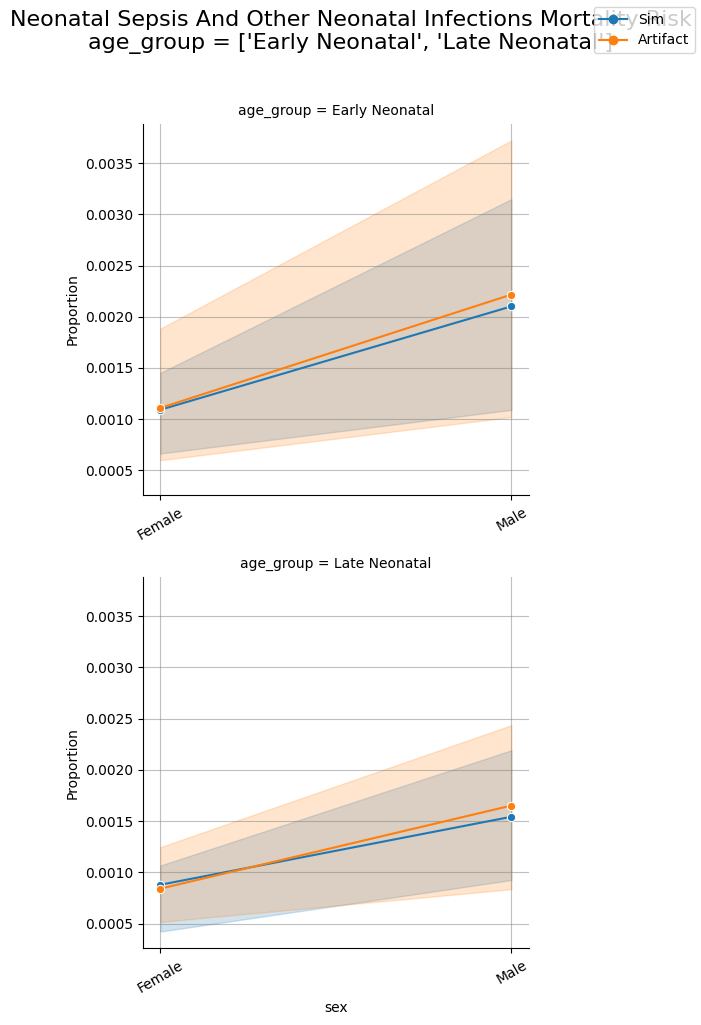

In [18]:
vc.plot_comparison(
    sepsis_compare_key, type="line", x_axis="sex", condition={"age_group": ['Early Neonatal', 'Late Neonatal']}, subplots=True
)

In [19]:
# Need to get GBD data to cache custom GBD data since we cannot not pull mortality ratio from vivarium_inputs 
# Cause ids:
# all_causes: 294
# Preterm birth: 381
# Neonatal encephalopathy due to birth asphyxia : 382
# neonatal sepsis: 383
# 
gbd_births = db_queries.get_population(location_id=[179],
                                release_id=16,
                                year_id=2023,
                                age_group_id=164,
                                sex_id=[1, 2])
gbd_deaths = get_draws(location_id=[179],
                                release_id=16,
                                year_id=2023,
                                source='codcorrect',
                                metric_id=1,
                                measure_id=1,
                                gbd_id=[383],
                                age_group_id=[2,3], # enn and lnn
                                gbd_id_type='cause_id')

/ihme/homes/albrja/miniconda3/envs/mncnh/lib/python3.11/site-packages/get_draws/api.py:194: UserWarning: No version_id was specified, so get_draws will automatically determine a best version ID to use from the given parameters. If you want to retrieve a specific version please pass a version_id directly.
  warnings.warn(


In [20]:
draw_cols = [col for col in gbd_deaths.columns if "draw" in col]

In [21]:
gbd_enn_0 = gbd_births.set_index(['location_id','sex_id'])[['population']]
gbd_enn_deaths = gbd_deaths.loc[gbd_deaths.age_group_id==2]
gbd_enn_mortality_ratio = gbd_enn_deaths.merge(gbd_enn_0, on=['location_id','sex_id'])
for col in draw_cols:
    gbd_enn_mortality_ratio[col] = gbd_enn_mortality_ratio[col] / gbd_enn_mortality_ratio.population
gbd_enn_mortality_ratio = gbd_enn_mortality_ratio.drop(columns='population').reset_index(drop=True)

gbd_enn_mortality_ratio

,age_group_id,cause_id,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,...,draw_96,draw_97,draw_98,draw_99,location_id,measure_id,metric_id,sex_id,year_id,version_id
0,2,383,0.001670,0.002123,0.001766,0.003316,0.002106,0.003292,0.001502,0.002168,...,0.002236,0.001093,0.004044,0.002482,179,1,1,1,2023,528
1,2,383,0.001185,0.001423,0.001329,0.000991,0.000813,0.000533,0.000751,0.001391,...,0.001032,0.001504,0.000792,0.001212,179,1,1,2,2023,528


In [22]:
# Population of LNN age group start
gbd_lnn_0 = gbd_enn_deaths.merge(gbd_enn_0, on=['location_id','sex_id'])
for col in draw_cols:
    gbd_lnn_0[col] = gbd_lnn_0.population - gbd_lnn_0[col]
gbd_lnn_0 = gbd_lnn_0.drop(columns='population')
gbd_lnn_0["age_group_id"] = 3  # This comes from gbd_enn_deaths above
gbd_lnn_0 = gbd_lnn_0.set_index([col for col in gbd_lnn_0.columns if col not in draw_cols])
gbd_lnn_0

draw_0  \
age_group_id cause_id location_id measure_id metric_id sex_id year_id version_id                 
3            383      179         1          1         1      2023    528         1.882261e+06   
                                                       2      2023    528         1.771262e+06   

                                                                                        draw_1  \
age_group_id cause_id location_id measure_id metric_id sex_id year_id version_id                 
3            383      179         1          1         1      2023    528         1.881407e+06   
                                                       2      2023    528         1.770840e+06   

                                                                                       draw_10  \
age_group_id cause_id location_id measure_id metric_id sex_id year_id version_id                 
3            383      179         1          1         1      2023    528         1.882079e+06   
                                                       2      2023    528         1.771006e+06   

                                                                                      draw_100  \
age_group_id cause_id location_id measure_id metric_id sex_id year_id version_id                 
3            383      179         1          1         1      2023    528         1.879156e+06   
                                                       2      2023    528         1.771606e+06   

                                                                                      draw_101  \
age_group_id cause_id location_id measure_id metric_id sex_id year_id version_id                 
3            383      179         1          1         1      2023    528         1.881438e+06   
                                                       2      2023    528         1.771921e+06   

                                                                                      draw_102  \
age_group_id cause_id location_id measure_id metric_id sex_id year_id version_id                 
3            383      179         1          1         1      2023    528         1.879202e+06   
                                                       2      2023    528         1.772419e+06   

                                                                                      draw_103  \
age_group_id cause_id location_id measure_id metric_id sex_id year_id version_id                 
3            383      179         1          1         1      2023    528         1.882578e+06   
                                                       2      2023    528         1.772032e+06   

                                                                                      draw_104  \
age_group_id cause_id location_id measure_id metric_id sex_id year_id version_id                 
3            383      179         1          1         1      2023    528         1.881321e+06   
                                                       2      2023    528         1.770896e+06   

                                                                                      draw_105  \
age_group_id cause_id location_id measure_id metric_id sex_id year_id version_id                 
3            383      179         1          1         1      2023    528         1.877420e+06   
                                                       2      2023    528         1.770643e+06   

                                                                                      draw_106  \
age_group_id cause_id location_id measure_id metric_id sex_id year_id version_id                 
3            383      179         1          1         1      2023    528         1.880581e+06   
                                                       2      2023    528         1.771248e+06   

                                                                                  ...  \
age_group_id cause_id location_id measure_id metric_id sex_id year_id

In [23]:
gbd_lnn_deaths = gbd_deaths.loc[gbd_deaths.age_group_id==3]
gbd_lnn_deaths = gbd_lnn_deaths.set_index([col for col in gbd_lnn_deaths.columns if col not in draw_cols])
gbd_lnn_deaths

draw_0  \
age_group_id cause_id location_id measure_id metric_id sex_id year_id version_id                
3            383      179         1          1         1      2023    528         2453.097129   
                                                       2      2023    528         1845.871125   

                                                                                       draw_1  \
age_group_id cause_id location_id measure_id metric_id sex_id year_id version_id                
3            383      179         1          1         1      2023    528         2881.680968   
                                                       2      2023    528         1709.343763   

                                                                                      draw_10  \
age_group_id cause_id location_id measure_id metric_id sex_id year_id version_id                
3            383      179         1          1         1      2023    528         2145.140379   
                                                       2      2023    528         1501.639763   

                                                                                     draw_100  \
age_group_id cause_id location_id measure_id metric_id sex_id year_id version_id                
3            383      179         1          1         1      2023    528         4472.386931   
                                                       2      2023    528         1182.856869   

                                                                                     draw_101  \
age_group_id cause_id location_id measure_id metric_id sex_id year_id version_id                
3            383      179         1          1         1      2023    528         3263.199985   
                                                       2      2023    528         1138.192717   

                                                                                     draw_102  \
age_group_id cause_id location_id measure_id metric_id sex_id year_id version_id                
3            383      179         1          1         1      2023    528         4291.410288   
                                                       2      2023    528         1064.715815   

                                                                                     draw_103  \
age_group_id cause_id location_id measure_id metric_id sex_id year_id version_id                
3            383      179         1          1         1      2023    528         2414.138508   
                                                       2      2023    528         1217.789572   

                                                                                     draw_104  \
age_group_id cause_id location_id measure_id metric_id sex_id year_id version_id                
3            383      179         1          1         1      2023    528         3222.615928   
                                                       2      2023    528         1864.598868   

                                                                                     draw_105  \
age_group_id cause_id location_id measure_id metric_id sex_id year_id version_id                
3            383      179         1          1         1      2023    528         4873.444937   
                                                       2      2023    528         2169.928992   

                                                                                     draw_106  \
age_group_id cause_id location_id measure_id metric_id sex_id year_id version_id                
3            383      179         1          1         1      2023    528         3581.918025   
                                                       2      2023    528         1560.570394   

                                                                                  ...  \
age_group_id cause_id location_id measure_id metric_id sex_id year_id version_id  ...   
3            383   

In [24]:
gbd_lnn_mortality_ratio = (gbd_lnn_deaths / gbd_lnn_0).reset_index()
gbd_lnn_mortality_ratio

,age_group_id,cause_id,location_id,measure_id,metric_id,sex_id,year_id,version_id,draw_0,draw_1,...,draw_90,draw_91,draw_92,draw_93,draw_94,draw_95,draw_96,draw_97,draw_98,draw_99
0,3,383,179,1,1,1,2023,528,0.001303,0.001532,...,0.002062,0.001745,0.001561,0.001265,0.001412,0.001361,0.001796,0.001083,0.002393,0.001777
1,3,383,179,1,1,2,2023,528,0.001042,0.000965,...,0.000440,0.000607,0.000533,0.001128,0.000864,0.000656,0.000880,0.000859,0.000685,0.000963


In [25]:
gbd_mortality_ratio = pd.concat([gbd_enn_mortality_ratio, gbd_lnn_mortality_ratio])
gbd_mortality_ratio

,age_group_id,cause_id,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,...,draw_96,draw_97,draw_98,draw_99,location_id,measure_id,metric_id,sex_id,year_id,version_id
0,2,383,0.001670,0.002123,0.001766,0.003316,0.002106,0.003292,0.001502,0.002168,...,0.002236,0.001093,0.004044,0.002482,179,1,1,1,2023,528
1,2,383,0.001185,0.001423,0.001329,0.000991,0.000813,0.000533,0.000751,0.001391,...,0.001032,0.001504,0.000792,0.001212,179,1,1,2,2023,528
0,3,383,0.001303,0.001532,0.001140,0.002380,0.001734,0.002284,0.001282,0.001713,...,0.001796,0.001083,0.002393,0.001777,179,1,1,1,2023,528
1,3,383,0.001042,0.000965,0.000848,0.000668,0.000642,0.000601,0.000687,0.001053,...,0.000880,0.000859,0.000685,0.000963,179,1,1,2,2023,528


In [26]:
# Cache custom GBD data so we can then use that to compare the simulation to GBD
vc.cache_gbd_data(sepsis_compare_key, gbd_mortality_ratio)

2026-01-14 14:36:56.360 | DEBUG    | vivarium_gbd_access.utilities:get_memory:41 - Config: 'input_data:
    cache_data:
        base: True
    intermediary_data_cache_path:
        base: /share/scratch/users/{username}/cache'
2026-01-14 14:36:56.539 | DEBUG    | vivarium_gbd_access.utilities:get_memory:46 - Cache Dir: '/share/scratch/users/albrja/cache'
2026-01-14 14:36:56.892 | DEBUG    | vivarium_gbd_access.utilities:get_memory:41 - Config: 'input_data:
    cache_data:
        base: True
    intermediary_data_cache_path:
        base: /share/scratch/users/{username}/cache'
2026-01-14 14:36:56.893 | DEBUG    | vivarium_gbd_access.utilities:get_memory:46 - Cache Dir: '/share/scratch/users/albrja/cache'
/ihme/homes/albrja/miniconda3/envs/mncnh/lib/python3.11/site-packages/vivarium_inputs/utilities.py:519: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

In [27]:
# Cache adjust birth counts for weight aggregation
gbd_enn_0 = gbd_enn_0.reset_index()
gbd_enn_0["age_group_id"] = 2
gbd_enn_0

,location_id,sex_id,population,age_group_id
0,179,1,1.885409e+06,2
1,179,2,1.773364e+06,2


In [28]:
enn_draw_pop = pd.DataFrame(
    {draw: gbd_enn_0['population'] for draw in draw_cols}
).reset_index(drop=True)
# enn_draw_pop["age_group_id"] = 2
# enn_draw_pop["year_id"] = 2023
enn_draw_pop

,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,draw_106,...,draw_90,draw_91,draw_92,draw_93,draw_94,draw_95,draw_96,draw_97,draw_98,draw_99
0,1.885409e+06,1.885409e+06,1.885409e+06,1.885409e+06,1.885409e+06,1.885409e+06,1.885409e+06,1.885409e+06,1.885409e+06,1.885409e+06,...,1.885409e+06,1.885409e+06,1.885409e+06,1.885409e+06,1.885409e+06,1.885409e+06,1.885409e+06,1.885409e+06,1.885409e+06,1.885409e+06
1,1.773364e+06,1.773364e+06,1.773364e+06,1.773364e+06,1.773364e+06,1.773364e+06,1.773364e+06,1.773364e+06,1.773364e+06,1.773364e+06,...,1.773364e+06,1.773364e+06,1.773364e+06,1.773364e+06,1.773364e+06,1.773364e+06,1.773364e+06,1.773364e+06,1.773364e+06,1.773364e+06


In [29]:
enn_pop = pd.concat([gbd_enn_0, enn_draw_pop], axis=1)
enn_pop['year_id'] = 2023
enn_pop = enn_pop.drop(columns='population')
enn_pop

,location_id,sex_id,age_group_id,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,...,draw_91,draw_92,draw_93,draw_94,draw_95,draw_96,draw_97,draw_98,draw_99,year_id
0,179,1,2,1.885409e+06,1.885409e+06,1.885409e+06,1.885409e+06,1.885409e+06,1.885409e+06,1.885409e+06,...,1.885409e+06,1.885409e+06,1.885409e+06,1.885409e+06,1.885409e+06,1.885409e+06,1.885409e+06,1.885409e+06,1.885409e+06,2023
1,179,2,2,1.773364e+06,1.773364e+06,1.773364e+06,1.773364e+06,1.773364e+06,1.773364e+06,1.773364e+06,...,1.773364e+06,1.773364e+06,1.773364e+06,1.773364e+06,1.773364e+06,1.773364e+06,1.773364e+06,1.773364e+06,1.773364e+06,2023


In [30]:
gbd_lnn_0 = gbd_lnn_0.reset_index()
gbd_lnn_0 = gbd_lnn_0[["location_id", "sex_id", "age_group_id", "year_id"] + draw_cols]
gbd_lnn_0

,location_id,sex_id,age_group_id,year_id,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,...,draw_90,draw_91,draw_92,draw_93,draw_94,draw_95,draw_96,draw_97,draw_98,draw_99
0,179,1,3,2023,1.882261e+06,1.881407e+06,1.882079e+06,1.879156e+06,1.881438e+06,1.879202e+06,...,1.879863e+06,1.880611e+06,1.880369e+06,1.882643e+06,1.882367e+06,1.882531e+06,1.881192e+06,1.883347e+06,1.877785e+06,1.880729e+06
1,179,2,3,2023,1.771262e+06,1.770840e+06,1.771006e+06,1.771606e+06,1.771921e+06,1.772419e+06,...,1.772466e+06,1.771495e+06,1.772303e+06,1.770531e+06,1.771881e+06,1.771917e+06,1.771534e+06,1.770696e+06,1.771959e+06,1.771215e+06


In [31]:
sepsis_adjusted_birth_counts = pd.concat([enn_pop, gbd_lnn_0])
sepsis_adjusted_birth_counts

,location_id,sex_id,age_group_id,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,...,draw_91,draw_92,draw_93,draw_94,draw_95,draw_96,draw_97,draw_98,draw_99,year_id
0,179,1,2,1.885409e+06,1.885409e+06,1.885409e+06,1.885409e+06,1.885409e+06,1.885409e+06,1.885409e+06,...,1.885409e+06,1.885409e+06,1.885409e+06,1.885409e+06,1.885409e+06,1.885409e+06,1.885409e+06,1.885409e+06,1.885409e+06,2023
1,179,2,2,1.773364e+06,1.773364e+06,1.773364e+06,1.773364e+06,1.773364e+06,1.773364e+06,1.773364e+06,...,1.773364e+06,1.773364e+06,1.773364e+06,1.773364e+06,1.773364e+06,1.773364e+06,1.773364e+06,1.773364e+06,1.773364e+06,2023
0,179,1,3,1.882261e+06,1.881407e+06,1.882079e+06,1.879156e+06,1.881438e+06,1.879202e+06,1.882578e+06,...,1.880611e+06,1.880369e+06,1.882643e+06,1.882367e+06,1.882531e+06,1.881192e+06,1.883347e+06,1.877785e+06,1.880729e+06,2023
1,179,2,3,1.771262e+06,1.770840e+06,1.771006e+06,1.771606e+06,1.771921e+06,1.772419e+06,1.772032e+06,...,1.771495e+06,1.772303e+06,1.770531e+06,1.771881e+06,1.771917e+06,1.771534e+06,1.770696e+06,1.771959e+06,1.771215e+06,2023


In [32]:
# Note: I understand this is very hidden that the weights for GBD data also have to be cached.
# What is a good way to communicate this?
vc.cache_gbd_data("cause.neonatal_sepsis_and_other_neonatal_infections.adjusted_birth_counts", sepsis_adjusted_birth_counts)

2026-01-14 14:36:57.294 | DEBUG    | vivarium_gbd_access.utilities:get_memory:41 - Config: 'input_data:
    cache_data:
        base: True
    intermediary_data_cache_path:
        base: /share/scratch/users/{username}/cache'
2026-01-14 14:36:57.295 | DEBUG    | vivarium_gbd_access.utilities:get_memory:46 - Cache Dir: '/share/scratch/users/albrja/cache'
2026-01-14 14:36:57.349 | DEBUG    | vivarium_gbd_access.utilities:get_memory:41 - Config: 'input_data:
    cache_data:
        base: True
    intermediary_data_cache_path:
        base: /share/scratch/users/{username}/cache'
2026-01-14 14:36:57.350 | DEBUG    | vivarium_gbd_access.utilities:get_memory:46 - Cache Dir: '/share/scratch/users/albrja/cache'
/ihme/homes/albrja/miniconda3/envs/mncnh/lib/python3.11/site-packages/vivarium_inputs/utilities.py:519: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

In [33]:
# Now let's compare the simulation to GBD
# Note: This currently overwrites the previous comparison that had the same key.
# This is will be updated at some point so users will have access to all comparisons
vc.add_comparison(
    sepsis_compare_key,
    test_source="sim",
    ref_source="gbd",
)

2026-01-14 14:37:05.367 | INFO     | vivarium_testing_utils.automated_validation.data_transformation.age_groups:_format_dataframe:584 - Rebinning DataFrame age groups from <vivarium_testing_utils.automated_validation.data_transformation.age_groups.AgeSchema object at 0x7ff6b9e33750> to <vivarium_testing_utils.automated_validation.data_transformation.age_groups.AgeSchema object at 0x7ff6b9e31bd0>.
2026-01-14 14:37:08.625 | INFO     | vivarium_testing_utils.automated_validation.data_transformation.age_groups:_format_dataframe:584 - Rebinning DataFrame age groups from <vivarium_testing_utils.automated_validation.data_transformation.age_groups.AgeSchema object at 0x7ff6ba699b50> to <vivarium_testing_utils.automated_validation.data_transformation.age_groups.AgeSchema object at 0x7ff6bbf22a50>.
2026-01-14 14:37:11.258 | INFO     | vivarium_testing_utils.automated_validation.data_transformation.age_groups:_format_dataframe:584 - Rebinning DataFrame age groups from <vivarium_testing_utils.auto

In [34]:
sepsis_sim_gbd = vc.get_frame(
    sepsis_compare_key, 
    aggregate_draws=True, 
    # stratifications=[],
    filters={"age_group": ["Early Neonatal", "Late Neonatal"]}
)
sepsis_sim_gbd

2026-01-14 14:37:11.365 | WARNING  | vivarium_testing_utils.automated_validation.data_transformation.calculations:ratio:73 - Denominator has zero values. These will be put into the ratio dataframe as NaN.
2026-01-14 14:37:16.496 | WARNING  | vivarium_testing_utils.automated_validation.data_transformation.calculations:ratio:73 - Denominator has zero values. These will be put into the ratio dataframe as NaN.


test_mean  \
entity                                        measure        sex    age_group                   
neonatal_sepsis_and_other_neonatal_infections mortality_risk Female Early Neonatal   0.001092   
                                                                    Late Neonatal    0.000879   
                                                             Male   Early Neonatal   0.002102   
                                                                    Late Neonatal    0.001543   

                                                                                    test_2.5%  \
entity                                        measure        sex    age_group                   
neonatal_sepsis_and_other_neonatal_infections mortality_risk Female Early Neonatal   0.000665   
                                                                    Late Neonatal    0.000422   
                                                             Male   Early Neonatal   0.001091   
                                                                    Late Neonatal    0.000925   

                                                                                    test_97.5%  \
entity                                        measure        sex    age_group                    
neonatal_sepsis_and_other_neonatal_infections mortality_risk Female Early Neonatal    0.001452   
                                                                    Late Neonatal     0.001066   
                                                             Male   Early Neonatal    0.003148   
                                                                    Late Neonatal     0.002192   

                                                                                    reference_mean  \
entity                                        measure        sex    age_group                        
neonatal_sepsis_and_other_neonatal_infections mortality_risk Female Early Neonatal        0.001110   
                                                                    Late Neonatal         0.000829   
                                                             Male   Early Neonatal        0.002217   
                                                                    Late Neonatal         0.001612   

                                                                                    reference_2.5%  \
entity                                        measure        sex    age_group                        
neonatal_sepsis_and_other_neonatal_infections mortality_risk Female Early Neonatal        0.000601   
                                                                    Late Neonatal         0.000509   
                                                             Male   Early Neonatal        0.001022   
                                                                    Late Neonatal         0.000815   

                                                                                    reference_97.5%  
entity                                        measure        sex    age_group                        
neonatal_sepsis_and_other_neonatal_infections mortality_risk Female Early Neonatal         0.001884  
                                                                    Late Neonatal          0.001229  
                                                             Male   Early Neonatal         0.003721  
                                                                    Late Neonatal          0.002378

2026-01-14 14:37:16.754 | WARNING  | vivarium_testing_utils.automated_validation.data_transformation.calculations:ratio:73 - Denominator has zero values. These will be put into the ratio dataframe as NaN.
2026-01-14 14:37:21.480 | WARNING  | vivarium_testing_utils.automated_validation.data_transformation.calculations:ratio:73 - Denominator has zero values. These will be put into the ratio dataframe as NaN.


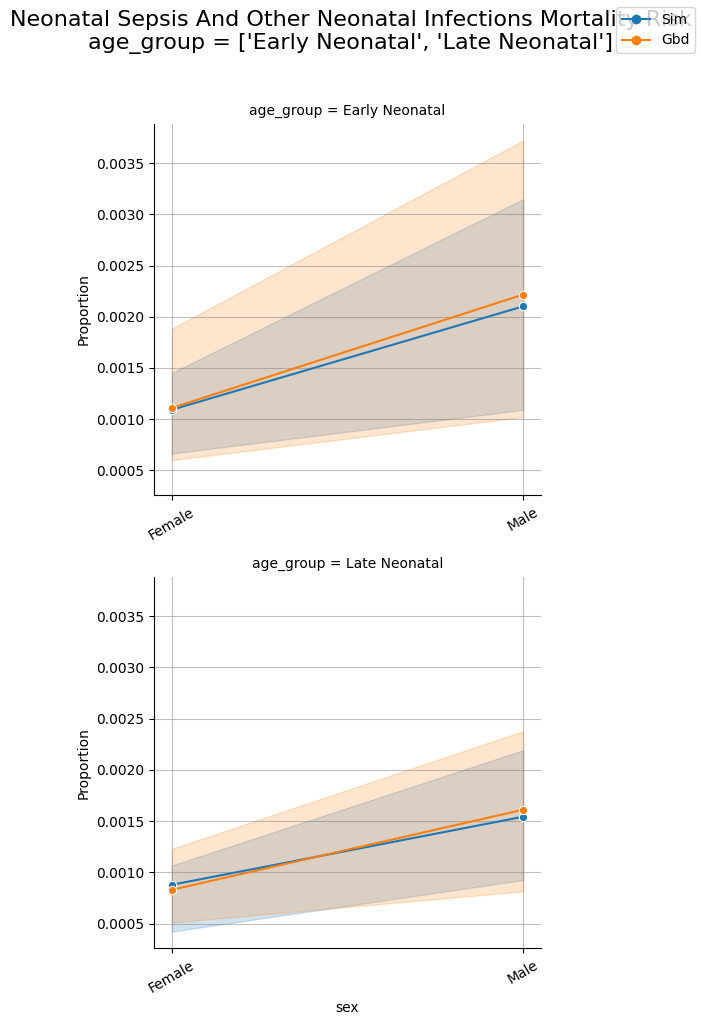

In [35]:
vc.plot_comparison(
    sepsis_compare_key, type="line", x_axis="sex", condition={"age_group": ['Early Neonatal', 'Late Neonatal']}, subplots=True
)

In [36]:
preterm_birth_key = "cause.neonatal_preterm_birth.mortality_risk"

In [37]:
vc.add_new_measure(preterm_birth_key, NeonatalPretermBirthMortalityRisk)

In [39]:
vc.add_comparison(
    preterm_birth_key,
    test_source="sim",
    ref_source="artifact",
)

2026-01-14 14:40:47.642 | INFO     | vivarium_testing_utils.automated_validation.data_transformation.age_groups:_format_dataframe:584 - Rebinning DataFrame age groups from <vivarium_testing_utils.automated_validation.data_transformation.age_groups.AgeSchema object at 0x7ff6b9b78590> to <vivarium_testing_utils.automated_validation.data_transformation.age_groups.AgeSchema object at 0x7ff6b9b7a790>.
2026-01-14 14:40:50.933 | INFO     | vivarium_testing_utils.automated_validation.data_transformation.age_groups:_format_dataframe:584 - Rebinning DataFrame age groups from <vivarium_testing_utils.automated_validation.data_transformation.age_groups.AgeSchema object at 0x7ff6b9b47c10> to <vivarium_testing_utils.automated_validation.data_transformation.age_groups.AgeSchema object at 0x7ff6b9b45010>.
2026-01-14 14:40:53.590 | INFO     | vivarium_testing_utils.automated_validation.data_transformation.age_groups:_format_dataframe:584 - Rebinning DataFrame age groups from <vivarium_testing_utils.auto

In [40]:
vc.metadata(preterm_birth_key)

2026-01-14 14:41:33.594 | WARNING  | vivarium_testing_utils.automated_validation.data_transformation.calculations:ratio:73 - Denominator has zero values. These will be put into the ratio dataframe as NaN.
2026-01-14 14:42:35.571 | WARNING  | vivarium_testing_utils.automated_validation.data_transformation.calculations:ratio:73 - Denominator has zero values. These will be put into the ratio dataframe as NaN.


,Test Data,Reference Data
Property,,
Measure Key,cause.neonatal_preterm_birth.mortality_risk,cause.neonatal_preterm_birth.mortality_risk
Source,sim,artifact
Shared Indices,"age_group, input_draw, sex","age_group, input_draw, sex"
Source Specific Indices,"acs_availability,acs_eligibility,antibiotics_availability,cpap_availability,delivery_facility_type,preterm_birth,probiotics_availability,random_seed, scenario","year_end, year_start"
Size,"16,640,000 rows × 1 columns","12,500 rows × 1 columns"
Num Draws,10,250
Input Draws,"22, 60, 71, 79, 115, 118, 146,167, 197, 244",range(0-249)
Num Seeds,10,
Run Time,Dec 19 14:51 2025,Dec 17 11:04 2025


,Test Data,Reference Data
Property,,
Measure Key,cause.neonatal_preterm_birth.mortality_risk,cause.neonatal_preterm_birth.mortality_risk
Source,sim,artifact
Shared Indices,"age_group, input_draw, sex","age_group, input_draw, sex"
Source Specific Indices,"acs_availability, acs_eligibility, antibiotics...","year_end, year_start"
Size,"16,640,000 rows × 1 columns","12,500 rows × 1 columns"
Num Draws,10,250
Input Draws,"22, 60, 71, 79, 115, 118, 146, 167, 197, 244",range(0-249)
Num Seeds,10,
Run Time,Dec 19 14:51 2025,Dec 17 11:04 2025


In [ ]:
preterm_diff = vc.get_frame(
    preterm_birth_key, 
    aggregate_draws=True, 
    # stratifications=[],
    filters={"age_group": ["Early Neonatal", "Late Neonatal"]}
)
preterm_diff

2026-01-14 14:42:43.068 | WARNING  | vivarium_testing_utils.automated_validation.data_transformation.calculations:ratio:73 - Denominator has zero values. These will be put into the ratio dataframe as NaN.
